In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
## dataset on housing prices 
dataset_dir = '../../../datasets/house_prices/'

## you can read the data_description.txt in the directory to figure out 
## what the columns mean 
train = pd.read_csv(dataset_dir + 'train.csv')
print train.shape

test = pd.read_csv(dataset_dir + 'test.csv')
print test.shape

(1460, 81)
(1459, 80)


In [3]:
qualitative = train[['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
               'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 
               'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 
               'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 
               'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 
               'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'PavedDrive', 
               'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities', 'MSSubClass']]

In [4]:
qual_cols = qualitative.columns.tolist()

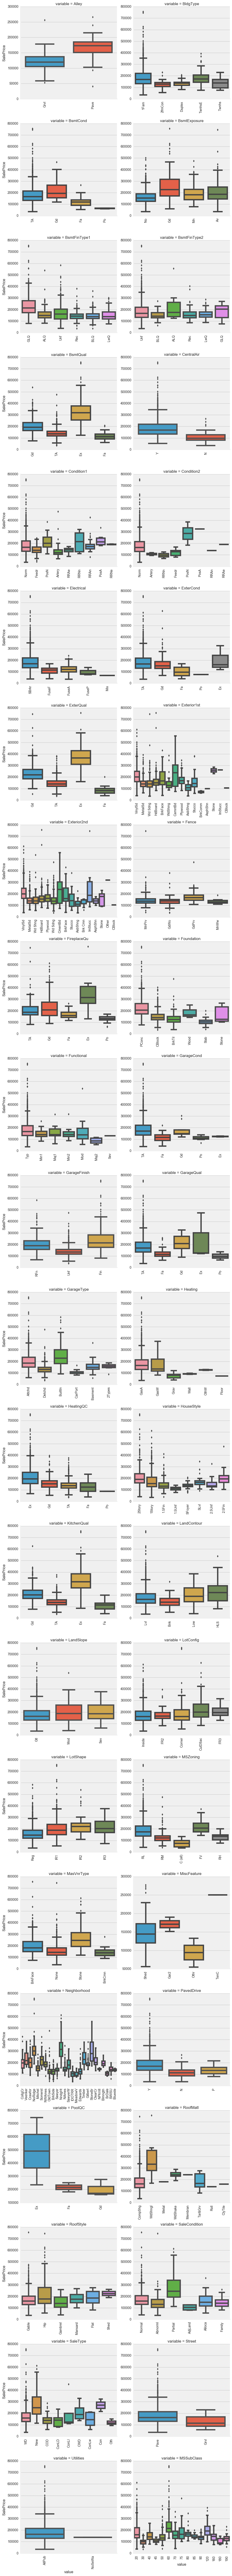

In [5]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
f = pd.melt(train, id_vars=['SalePrice'], value_vars=qual_cols)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

In [6]:
#figure out which predicter to the corr with output
keep = ['BsmtQual', 'ExterCond', 'FireplaceQu', 'HeatingQC', 'KitchenQual']
def rating(cat):
    rating = {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1 }
    for x, y in rating.items():
        cat = str(cat)
        if x in cat:
            return y
    return 0

for c in keep:
    train[c] = train[c].apply(rating)

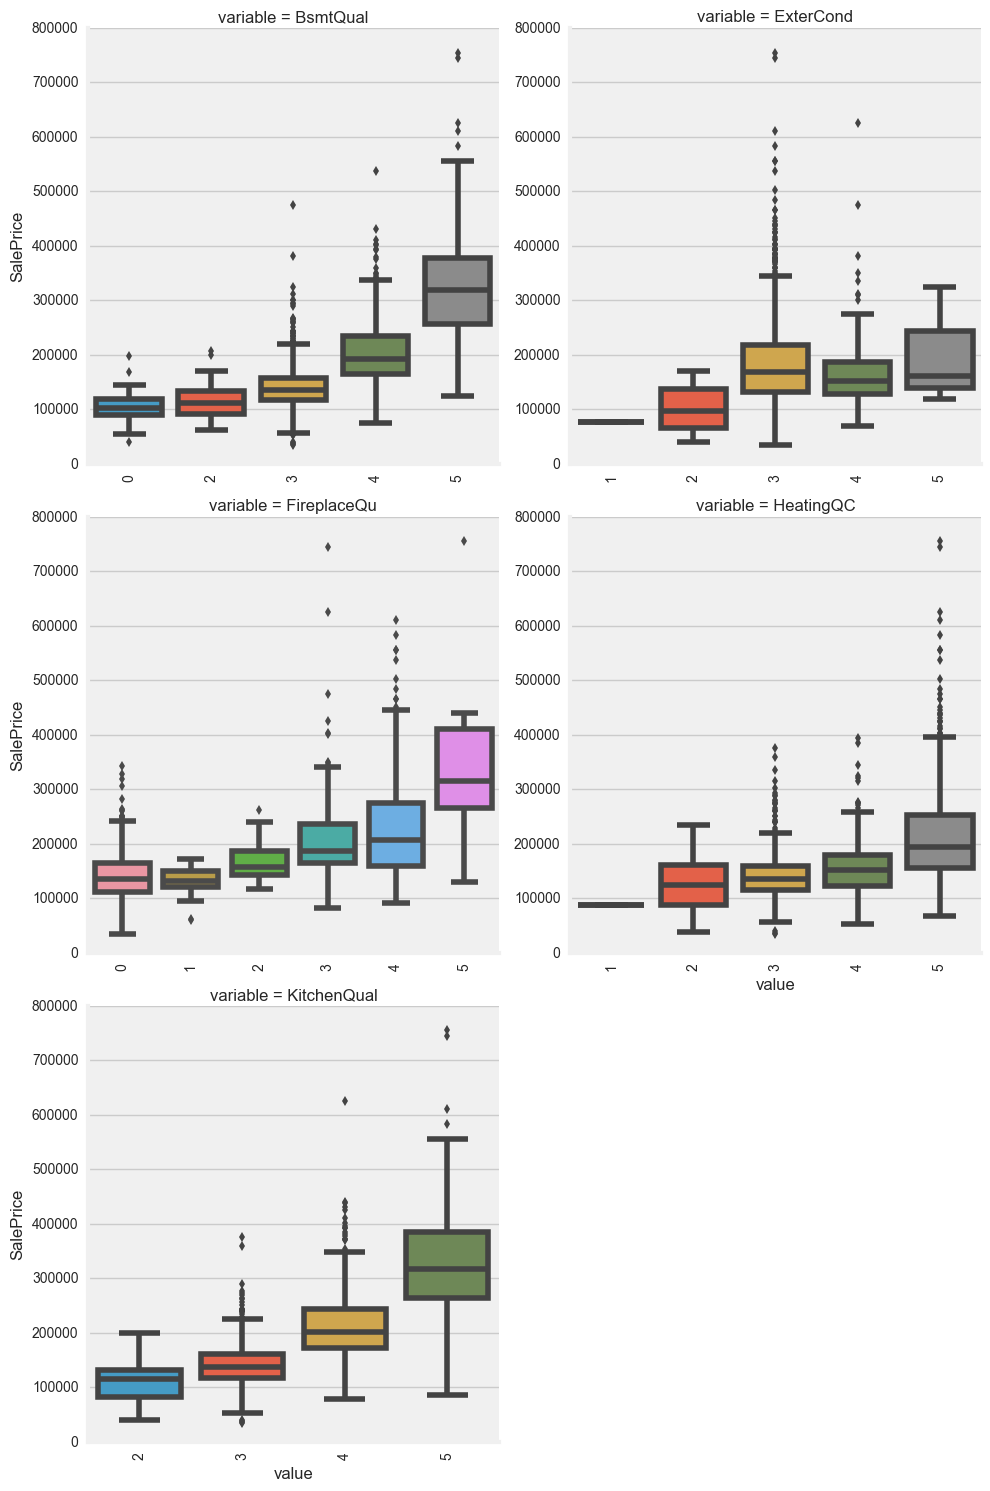

In [7]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
f = pd.melt(train, id_vars=['SalePrice'], value_vars=keep)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")